# **MEDICAL INSURANCE COST**

![Alt text](vector_graphics/OKY6FW0.jpg)

<a href="http://www.freepik.com">Designed by Vilmosvarga / Freepik</a>

## **Introduction**

Health insurance or medical insurance is a type of insurance that cover a whole or a part of the risk of a person incurring medical expenses. The Dataset contains metrics such as age, sex, bmi, children, smoker, region and charges. The objective of this project is to study the data, create data preprocessing pipelines and build a few machine learning models to predict insurance charges.

- **age**: age of primary beneficiary
- **sex**: insurance contractor gender, female, male
- **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / $m^2$) using the ratio of height to weight, ideally 18.5 to 24.9
- **children**: Number of children covered by health insurance / Number of dependents
- **smoker**: Smoking
- **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges**: Individual medical costs billed by health insurance

## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## **Flowchart**

![Alt text](flowcharts/medical%20insurance%20ML%20flowchart(1).drawio.png)

Tool: https://app.diagrams.net/

## **Loading the data**

In [2]:
insurance_original = pd.read_csv("datasets/insurance/insurance.csv")
insurance_original.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Create a copy of the data**

In [3]:
insurance = insurance_original.copy()
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in the dataframe!

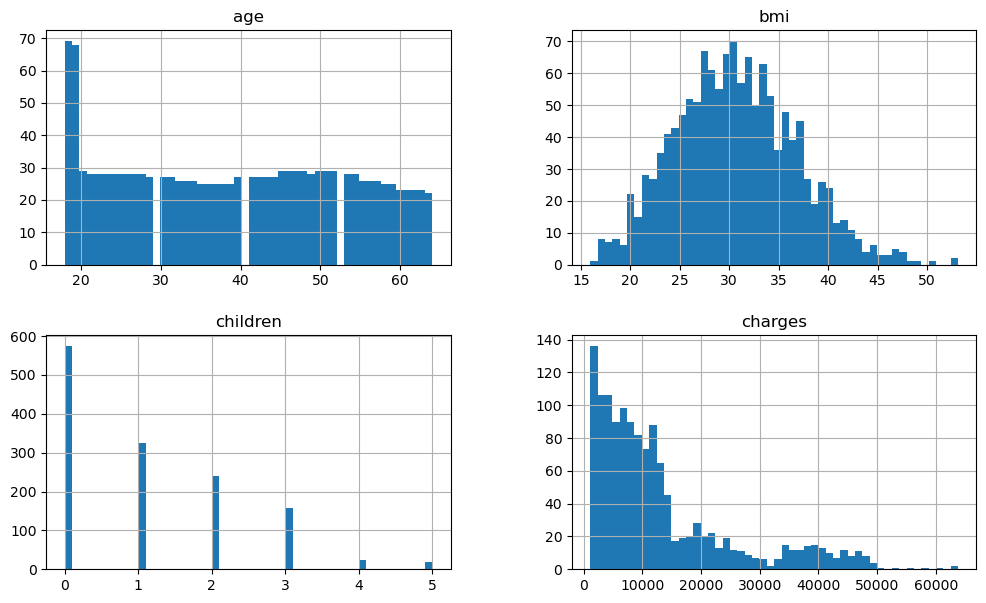

In [6]:
insurance.hist(bins=50, figsize = (12,7))
plt.show()

## **Splitting the data into training and test sets**

To avoid 'Data Snooping bias', we split the data into `train_set` and `test_set` now (Before preprocessing).

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(insurance, test_size=0.2, random_state=42)

In [8]:
print(f"train set shape: {train_set.shape}, Test set shape: {test_set.shape}")

train set shape: (1070, 7), Test set shape: (268, 7)


In [9]:
train_set.head()

,age,sex,bmi,children,smoker,region,charges
560,46,female,19.95,2,no,northwest,9193.83850
1285,47,female,24.32,0,no,northeast,8534.67180
1142,52,female,24.86,0,no,southeast,27117.99378
969,39,female,34.32,5,no,southeast,8596.82780
486,54,female,21.47,3,no,northwest,12475.35130


## **Discover and Visualize the data**

In [10]:
insurance_eda = train_set.copy()
insurance_eda.head()

,age,sex,bmi,children,smoker,region,charges
560,46,female,19.95,2,no,northwest,9193.83850
1285,47,female,24.32,0,no,northeast,8534.67180
1142,52,female,24.86,0,no,southeast,27117.99378
969,39,female,34.32,5,no,southeast,8596.82780
486,54,female,21.47,3,no,northwest,12475.35130


In [11]:
corr_matrix = insurance_eda.corr()
corr_matrix["charges"].sort_values(ascending = False)

charges     1.000000
age         0.281721
bmi         0.197316
children    0.071885
Name: charges, dtype: float64

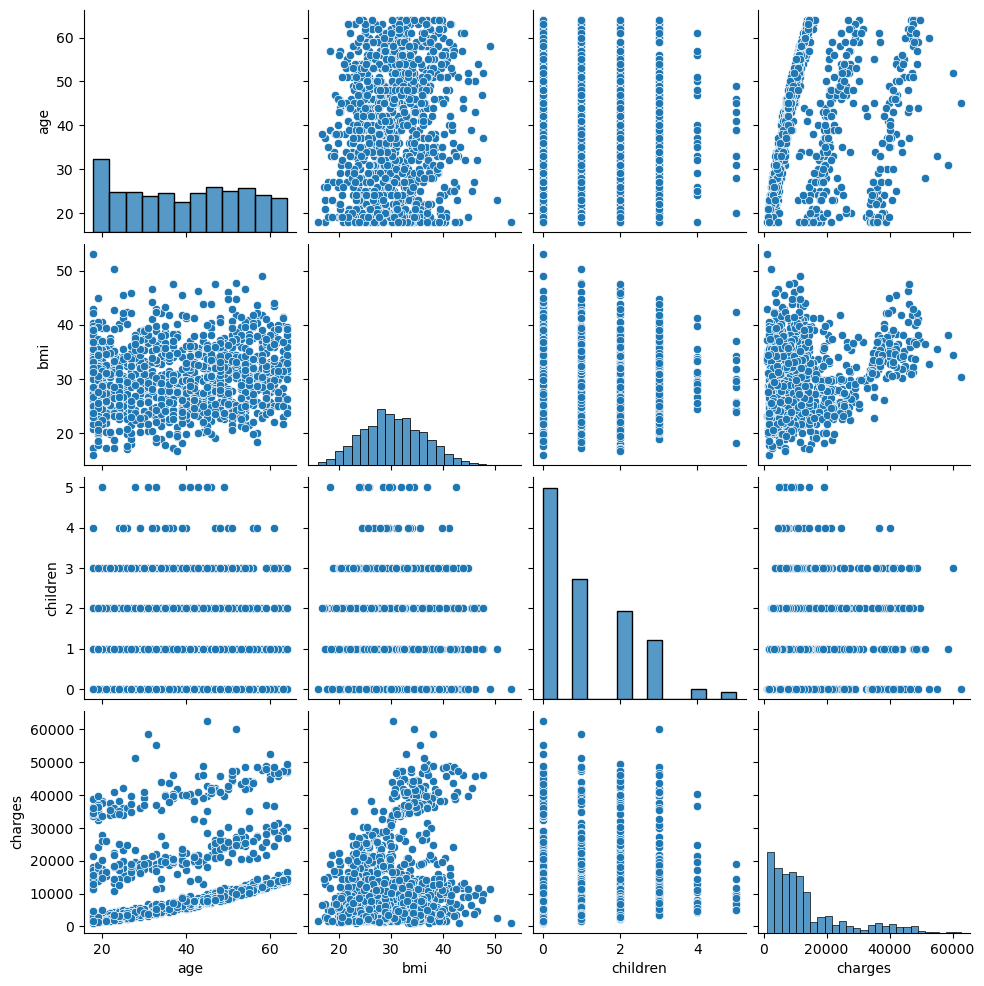

In [12]:
sns.pairplot(data=insurance_eda)
plt.show()

## **Check Correlations**

Dependent variable is `charges`. The type of data is quantitative. Based on this the following table shows the tests to be conducted.

|Sl.No|Attribute|Type of Data|Type of Test|
|:-|:-|:-|:-|
|1.|sex|categorical(2 groups)|t test|
|2.|smoker|categorical(2 groups)|t test|
|3.|Region|categorical(3+ groups)|One way ANOVA|
|4.|bmi|quantitative|Pearson correlation coefficient|
|5.|age|quantitative|Pearson correlation coefficient|
|6.|children|quantitative|Pearson correlation coefficient|
|7.|Charges|quantitative|-|

In [13]:
from scipy.stats import ttest_ind, f_oneway

*Null Hypothesis, $H_0$*: Population parameter (i.e., mean) of two groups (female and male) are same. Therefore the attribute `sex` doesn't influence `charges`.<br>
*Alternate Hypothesis, $H_1$*: Population parameter (i.e., mean) of two groups (female and male) are different. Therefore the attribute `sex` influences `charges`.

In [14]:
female_charges = insurance_eda[insurance_eda['sex']=='female']['charges']
male_charges = insurance_eda[insurance_eda['sex']=='male']['charges']

# Z-test on 'sex' and 'charges'
statistic, p = ttest_ind(female_charges, male_charges)
print(f"test statistic:{statistic}, p-value:{p}")

test statistic:-1.8593211471727094, p-value:0.06325648046006953


As a rule of thumb, since the p-value is > 0.05 we cannot reject the *Null hypothesis*. We conclude `sex` attributes has no significant influence on `charges`.

In [15]:
smoker = insurance_eda[insurance_eda['smoker']=='yes']['charges']
non_smoker = insurance_eda[insurance_eda['smoker']=='no']['charges']

# Z-test on 'smoker' and 'charges'.
statistic, p = ttest_ind(smoker, non_smoker)
print(f"test statistic:{statistic}, p-value:{p}")

test statistic:40.74250974952992, p-value:1.0360773472183773e-219


p-value < 0.05, So we reject the null hypothesis. `smoker` attribute has impact on `charges`.

In [16]:
insurance_eda['region'].unique()

array(['northwest', 'northeast', 'southeast', 'southwest'], dtype=object)

In [17]:
# One way ANOVA on 'region' and 'charges'
northwest = insurance_eda[insurance_eda['region']=='northwest']['charges']
northeast = insurance_eda[insurance_eda['region']=='northeast']['charges']
southeast = insurance_eda[insurance_eda['region']=='southeast']['charges']
southwest = insurance_eda[insurance_eda['region']=='southwest']['charges']

ANOVA = f_oneway(northwest, northeast, southeast, southwest)
print(f"test statistic: {ANOVA[0]}, p-value: {ANOVA[1]}")

test statistic: 1.8361874721748859, p-value: 0.13882094667255063


With a p-value 0.1388 which is greater than 0.05, `region` is not a pivotal attribute for `charges`.

The above test results may not be accurate since we didn't validate the assumptions of the tests. However they provided a rough idea about the impact of different categorical variables on insurance charges.

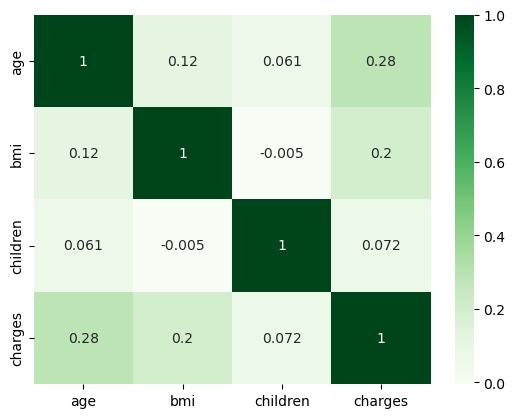

In [18]:
num_attr = ['age', 'bmi', 'children', 'charges']
sns.heatmap(insurance_eda[num_attr].corr(), cmap='Greens', annot=True)
plt.show()

It looks like `age` is the most promising quantitative attribute to predict `charges`. Let's discover more about this relationship.

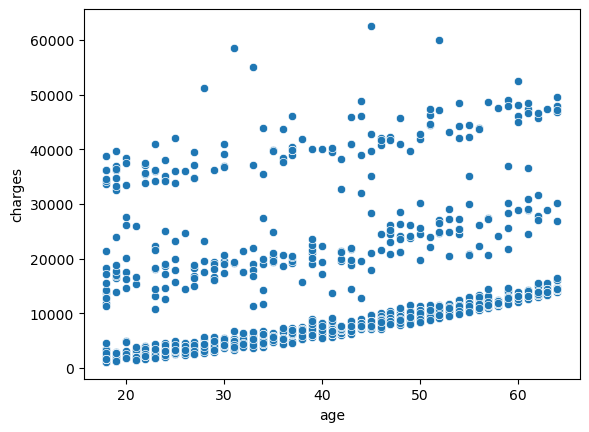

In [19]:
sns.scatterplot(x = 'age', y = 'charges', data=insurance_eda)
plt.show()

The plot above reveals a number of divisions, perhaps these are influenced by categories. Let's visualize with a bar graph to gain some intuition.

In [20]:
charges_by_sex = insurance_eda.groupby("sex", as_index=False)["charges"].mean()
charges_by_smoker = insurance_eda.groupby("smoker", as_index=False)["charges"].mean()
charges_by_region = insurance_eda.groupby("region", as_index=False)["charges"].mean()

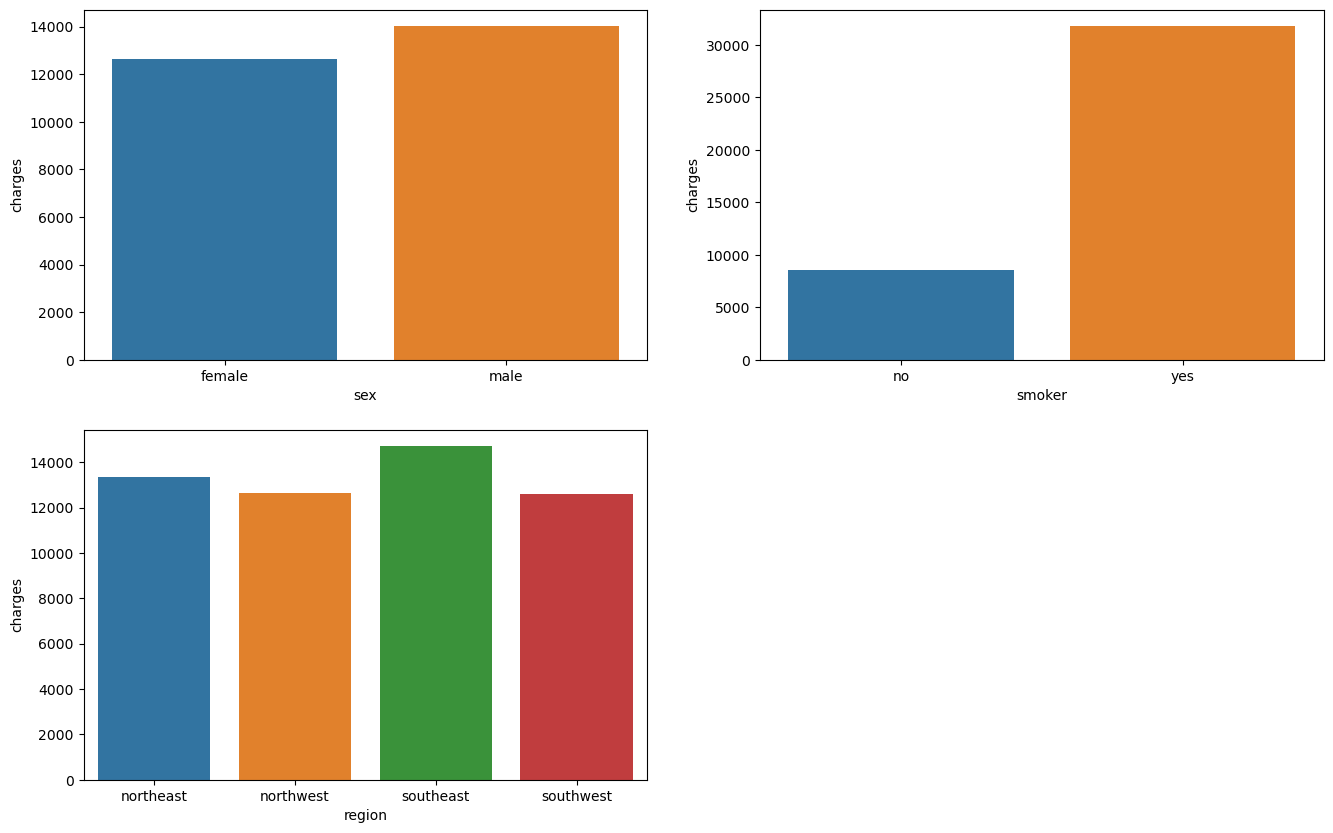

In [21]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.barplot(x='sex', y='charges', data=charges_by_sex)
plt.subplot(2,2,2)
sns.barplot(x='smoker', y='charges', data=charges_by_smoker)
plt.subplot(2,2,3)
sns.barplot(x='region', y='charges', data=charges_by_region)
plt.show()

Plot shows a significant difference in insurance charge for Smoker and Non-smoker.

## **Experimenting with attributes combinations**

1. **age and bmi**: Let us define the relationship as **bmi*age**

In [22]:
age_bmi = insurance_eda['age']*insurance_eda['bmi']

In [23]:
insurance_eda['age_bmi'] = age_bmi
insurance_eda.head()

,age,sex,bmi,children,smoker,region,charges,age_bmi
560,46,female,19.95,2,no,northwest,9193.83850,917.70
1285,47,female,24.32,0,no,northeast,8534.67180,1143.04
1142,52,female,24.86,0,no,southeast,27117.99378,1292.72
969,39,female,34.32,5,no,southeast,8596.82780,1338.48
486,54,female,21.47,3,no,northwest,12475.35130,1159.38


In [24]:
insurance_eda.corr()['charges'].sort_values(ascending=False)

charges     1.000000
age_bmi     0.317357
age         0.281721
bmi         0.197316
children    0.071885
Name: charges, dtype: float64

In [25]:
insurance_eda.corr()

,age,bmi,children,charges,age_bmi
age,1.000000,0.118274,0.060999,0.281721,0.884590
bmi,0.118274,1.000000,-0.005040,0.197316,0.538887
children,0.060999,-0.005040,1.000000,0.071885,0.046210
charges,0.281721,0.197316,0.071885,1.000000,0.317357
age_bmi,0.884590,0.538887,0.046210,0.317357,1.000000


In [26]:
insurance_eda.head()

,age,sex,bmi,children,smoker,region,charges,age_bmi
560,46,female,19.95,2,no,northwest,9193.83850,917.70
1285,47,female,24.32,0,no,northeast,8534.67180,1143.04
1142,52,female,24.86,0,no,southeast,27117.99378,1292.72
969,39,female,34.32,5,no,southeast,8596.82780,1338.48
486,54,female,21.47,3,no,northwest,12475.35130,1159.38


In [27]:
insurance_eda_attr_list = insurance_eda.columns
insurance_eda_attr_list

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_bmi'],
      dtype='object')

In [28]:
insurance_eda_cols_reo = ['age', 'bmi', 'children', 'sex', 'region', 'smoker', 'age_bmi', 'charges']
insurance_eda = insurance_eda[insurance_eda_cols_reo]
insurance_eda.head()

,age,bmi,children,sex,region,smoker,age_bmi,charges
560,46,19.95,2,female,northwest,no,917.70,9193.83850
1285,47,24.32,0,female,northeast,no,1143.04,8534.67180
1142,52,24.86,0,female,southeast,no,1292.72,27117.99378
969,39,34.32,5,female,southeast,no,1338.48,8596.82780
486,54,21.47,3,female,northwest,no,1159.38,12475.35130


**Summary**:
1. Good predictors of insurance charges: 'smoker', 'age' and 'bmi'.
2. Attribute combinations: `age_bmi = age*bmi` has $\approx$ 0.32 pearson correlation co-efficient with 'charges' attribute and 
 0.88 with 'age'. This implies there is high collinearity between age_bmi and age. We shall add a hyperparameter and gate the data preparation step so this feature can be ruled out of the dataframe if required.

## **Prepare the data for Machine Learning algorithms**

In [29]:
insurance = insurance_eda.copy()
insurance.head()

,age,bmi,children,sex,region,smoker,age_bmi,charges
560,46,19.95,2,female,northwest,no,917.70,9193.83850
1285,47,24.32,0,female,northeast,no,1143.04,8534.67180
1142,52,24.86,0,female,southeast,no,1292.72,27117.99378
969,39,34.32,5,female,southeast,no,1338.48,8596.82780
486,54,21.47,3,female,northwest,no,1159.38,12475.35130


In [30]:
# Split the dataframe into data and labels
insurance_labels = insurance['charges']
insurance = insurance.drop(['charges'], axis=1)

print(insurance)
print(insurance_labels)

      age     bmi  children     sex     region smoker  age_bmi
560    46  19.950         2  female  northwest     no   917.70
1285   47  24.320         0  female  northeast     no  1143.04
1142   52  24.860         0  female  southeast     no  1292.72
969    39  34.320         5  female  southeast     no  1338.48
486    54  21.470         3  female  northwest     no  1159.38
...   ...     ...       ...     ...        ...    ...      ...
1095   18  31.350         4  female  northeast     no   564.30
1130   39  23.870         5  female  southeast     no   930.93
1294   58  25.175         0    male  northeast     no  1460.15
860    37  47.600         2  female  southwest    yes  1761.20
1126   55  29.900         0    male  southwest     no  1644.50

[1070 rows x 7 columns]
560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600

## **Import and create required classes for ColumnTransformer.**

In [31]:
# IMPUTER: import SimpleImputer
from sklearn.impute import SimpleImputer

In [32]:
# CUSTOM TRANSFORMER: Combined attributes adder to include/exclude derived feature age_bmi.
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

    def __init__(self, add_age_bmi=True):
        self.add_age_bmi = add_age_bmi

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        age_bmi_attr = X[:, 0]*X[:, 1]
        if self.add_age_bmi:
            return np.c_[X, age_bmi_attr]
        else:
            return X

In [33]:
# SCALER: import StandardScaler() for numerical attributes
from sklearn.preprocessing import StandardScaler

In [34]:
# ENCODER: import OneHotEncoder for categorical variables.
from sklearn.preprocessing import OneHotEncoder

## **Transformation Pipelines and ColumnTransformer for data preprocessing.**

In [35]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('attr_adder', CombinedAttributesAdder(add_age_bmi=False)),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('imputer_cat', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder()),
])

In [36]:
num_attributes = ['age', 'bmi', 'children'] # If you toggle 'add_age_bmi' to True in 'attr_adder' object, ensure that you add 'age_bmi' to this list.
cat_attributes = ['sex', 'smoker', 'region']   

In [39]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('numerical_trnsf', num_pipeline, num_attributes),
    ('categorical_trnsf', cat_pipeline, cat_attributes),
])

insurance_preprocessed = preprocessor.fit_transform(insurance)

In [38]:
import joblib

In [40]:
scaler = preprocessor.named_transformers_['numerical_trnsf'].named_steps['std_scaler']
encoder = preprocessor.named_transformers_['categorical_trnsf'].named_steps['cat_encoder']

joblib.dump(scaler, 'transformers/scaler.joblib')
joblib.dump(encoder, 'transformers/encoder.joblib')

['transformers/encoder.joblib']

In [41]:
insurance_preprocessed.shape

(1070, 11)

## **Machine Learning**

- Linear Regression
- Decision Tree Regression
- Random forest Regression

We shall use $R^2$ as the performamce metric

$R^2=$ $1-\frac{RSS}{TSS}=$ $1- \frac{\displaystyle\sum_{i=1}^{n}(\hat y_i - y_i)^2}{\displaystyle\sum_{i=1}^{n}(y_i - \bar y_i)^2}$ 

In [42]:
# Function to display r2 scores from cross validation
def performance(scores: dict) -> None:
    print("\033[1mPERFORMANCE REPORT\033[0m\n------------------")
    print("\033[1mTRAIN SET\033[0m \n---------")
    print('R2 scores: ', scores['train_score'])
    print('Mean: ', np.mean(scores['train_score']))
    print('Standard deviation: ', np.std(scores['train_score']))
    print(' ')
    print("\033[1mTEST SET\033[0m \n--------")
    print('R2 scores: ', scores['test_score'])
    print('Mean: ', np.mean(scores['test_score']))
    print('Standard deviation: ', np.std(scores['test_score']))

In [43]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(insurance_preprocessed, insurance_labels)
lin_reg_pred = lin_reg.predict(insurance_preprocessed)

# 10-fold Cross Validation
from sklearn.model_selection import cross_validate
lin_reg_scores = cross_validate(lin_reg, insurance_preprocessed, insurance_labels, scoring='r2', cv=10, return_train_score=True)
performance(lin_reg_scores)

PERFORMANCE REPORT
------------------
TRAIN SET 
---------
R2 scores:  [0.74227793 0.74642866 0.73260773 0.73415602 0.73585544 0.74980465
 0.75506404 0.74522613 0.73991921 0.73723323]
Mean:  0.7418573059534481
Standard deviation:  0.006899466190724935
 
TEST SET 
--------
R2 scores:  [0.73541457 0.69696159 0.81850383 0.785235   0.78581745 0.62505557
 0.61028896 0.70647266 0.75466062 0.77900085]
Mean:  0.7297411102077807
Standard deviation:  0.06635242007878525


In [44]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(insurance_preprocessed, insurance_labels)
tree_reg_pred = tree_reg.predict(insurance_preprocessed)

# 10-fold Cross validation
tree_reg_scores = cross_validate(tree_reg, insurance_preprocessed, insurance_labels, scoring='r2', cv=10, return_train_score=True)
performance(tree_reg_scores)

PERFORMANCE REPORT
------------------
TRAIN SET 
---------
R2 scores:  [1.         0.99812183 0.99811019 0.99807159 0.99866664 0.99818067
 0.99944135 0.99813142 0.99810208 0.99811876]
Mean:  0.9984944538811339
Standard deviation:  0.0006468082423998352
 
TEST SET 
--------
R2 scores:  [0.70553975 0.70437542 0.70721612 0.70527    0.68205478 0.646872
 0.60997519 0.64540655 0.72064477 0.75749651]
Mean:  0.688485110291406
Standard deviation:  0.040945491163217544


In [45]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(insurance_preprocessed, insurance_labels)
forest_reg_pred = forest_reg.predict(insurance_preprocessed)

# 10-fold cross validation
forest_reg_scores = cross_validate(forest_reg, insurance_preprocessed, insurance_labels, scoring='r2', cv=10, return_train_score=True)
performance(forest_reg_scores)

PERFORMANCE REPORT
------------------
TRAIN SET 
---------
R2 scores:  [0.97619425 0.97615212 0.97399987 0.97398053 0.97485596 0.97570613
 0.9763406  0.97484231 0.97519563 0.97473816]
Mean:  0.9752005563011907
Standard deviation:  0.0008269967288819363
 
TEST SET 
--------
R2 scores:  [0.8307923  0.81224636 0.9022994  0.88345739 0.8225127  0.75994207
 0.77345567 0.79077518 0.82650041 0.84871597]
Mean:  0.8250697451837757
Standard deviation:  0.04268512189140051


In [46]:
# Support Vector Regression
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(insurance_preprocessed, insurance_labels)
svr_pred = svr.predict(insurance_preprocessed)

# 10 fold cross validation
svr_scores = cross_validate(svr, insurance_preprocessed, insurance_labels, scoring='r2', cv=10, return_train_score=True)
performance(svr_scores)

PERFORMANCE REPORT
------------------
TRAIN SET 
---------
R2 scores:  [-0.09613509 -0.09410457 -0.09820136 -0.09191718 -0.09666985 -0.09774714
 -0.09357299 -0.09739331 -0.09576877 -0.09902811]
Mean:  -0.09605383662433553
Standard deviation:  0.0021366613567893947
 
TEST SET 
--------
R2 scores:  [-0.12600423 -0.08985848 -0.09031954 -0.23617249 -0.06378236 -0.08518094
 -0.11647671 -0.08598425 -0.07126141 -0.04564927]
Mean:  -0.10106896730066148
Standard deviation:  0.05018312000569608


#### Summary of model performance:
|Model|Train set score|Validation set score|Inference|Action|
|:-|:-|:-|:-|:-|
|Linear Regression|0.7418|0.7297|Underfitting|Increase model complexity|
|Decision Tree Regression|0.9984|0.6884|Overfitting|Regularize|
|Random Forest Regression|0.9752|0.8251|Overfitting|Regularize|
|Support Vector Regression|-0.0960|-0.1010|Underfitting/Bad Model Choice|Discard|

## **Optimizing the Regression models**

**`lin_reg` model**

In [47]:
lin_reg_residuals = insurance_labels - lin_reg_pred

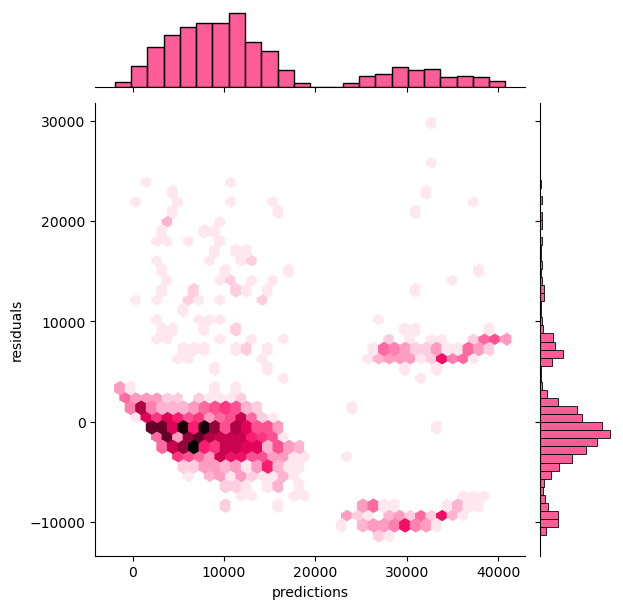

In [48]:
# sns.residplot(x = lin_reg_pred, y = lin_reg_residuals)
sns.jointplot(x=lin_reg_pred, y=lin_reg_residuals, kind="hex", color="#FB2576")
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.show()

The residuals are not randomly distrubuted around the the zero line, this voilates one of the assumptions of linear regression known as 'Linear Relationship'. We conclude that there is no linear relationship between dependent and independent variables and hence linear regression of the form $y=\beta_0+\beta_1x_1+\beta_2x_2+...+\beta_nx_n + \epsilon$</font> is not a suitable for prediction.

#### **Upgrading the Linear Regression to Polynomial Regression**

$y=\beta_0+\beta_1x+\beta_2{x}^2+\beta_3{x}^3...+\beta_n{x}^n + \epsilon$

In [49]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2)
insurance_poly = polynomial_features.fit_transform(insurance_preprocessed)

In [50]:
# Polynomial Regression
poly_reg = LinearRegression()
poly_reg.fit(insurance_poly, insurance_labels)
poly_reg_pred = poly_reg.predict(insurance_poly)

# 10-fold cross validation
poly_reg_scores = cross_validate(poly_reg, insurance_poly, insurance_labels, scoring='r2', cv=10, return_train_score=True)
performance(poly_reg_scores)

PERFORMANCE REPORT
------------------
TRAIN SET 
---------
R2 scores:  [0.84073455 0.8451757  0.83407933 0.83406497 0.84156451 0.84844183
 0.85044922 0.84666917 0.83828887 0.84040789]
Mean:  0.8419876054869228
Standard deviation:  0.0053718824685065015
 
TEST SET 
--------
R2 scores:  [0.84696276 0.80400931 0.90079004 0.88888    0.8374994  0.73953714
 0.74974148 0.75568197 0.86584149 0.84629   ]
Mean:  0.8235233600623708
Standard deviation:  0.05547631317555127


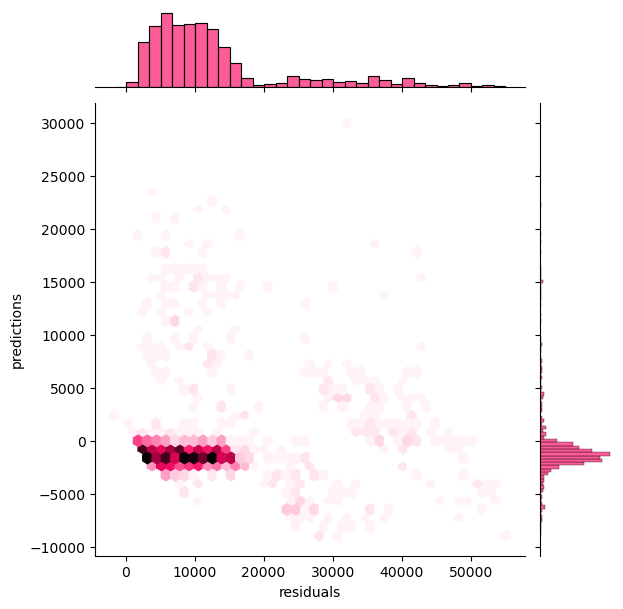

In [51]:
poly_residuals = insurance_labels - poly_reg_pred
# sns.residplot(x = poly_reg_pred, y = poly_residuals)
sns.jointplot(x=poly_reg_pred, y=poly_residuals, kind="hex", color="#FB2576")
plt.xlabel('residuals')
plt.ylabel('predictions')
plt.show()

This looks better.

### **Regularize the Decision Tree and Random Forest models**

In [52]:
tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

The tree had its hyperparameters set to default while training. We need to come up with best possible combination of hyperparameters based on some scoring criteria. We can make use of GridSearchCV.  

In [53]:
tree_reg.tree_.max_depth

18

## **GridSearchCV**

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [55]:
# Grid Search for Decision Tree Regressor
param_grid = [
    {'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features': [6,7,8,9,10,11]
    },
]


tree_reg = DecisionTreeRegressor()

grid_search = GridSearchCV(tree_reg, param_grid, cv=10, scoring="r2", return_train_score=True)
grid_search.fit(insurance_preprocessed, insurance_labels)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid=[{'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error', 'poisson'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                          'max_features': [6, 7, 8, 9, 10, 11]}],
             return_train_score=True, scoring='r2')

In [56]:
grid_search.best_params_

{'criterion': 'squared_error', 'max_depth': 4, 'max_features': 11}

In [57]:
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(mean_score, params)

0.5405954977081924 {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 6}
0.5967729324556169 {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 7}
0.5405954977081924 {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 8}
0.596772932455617 {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 9}
0.5967729324556169 {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 10}
0.5967729324556169 {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 11}
0.666109587166979 {'criterion': 'squared_error', 'max_depth': 2, 'max_features': 6}
0.732251128087819 {'criterion': 'squared_error', 'max_depth': 2, 'max_features': 7}
0.7161070182522712 {'criterion': 'squared_error', 'max_depth': 2, 'max_features': 8}
0.8075604893605777 {'criterion': 'squared_error', 'max_depth': 2, 'max_features': 9}
0.8161110544527528 {'criterion': 'squared_error', 'max_depth': 2, 'max_features': 10}
0.8161110544527528 {'criterion': 'squared_error', 'max_depth': 2,

Cross validation score<br>
0.8452393564198963 {'criterion': 'squared_error', 'max_depth': 4, 'max_features': 11}

In [58]:
# Decision Tree Regressor with best parameters
tree_reg = grid_search.best_estimator_

# 10 fold cross validation
tree_reg_scores = cross_validate(tree_reg, insurance_preprocessed, insurance_labels, scoring='r2', cv=10, return_train_score=True)
performance(tree_reg_scores)

PERFORMANCE REPORT
------------------
TRAIN SET 
---------
R2 scores:  [0.86629796 0.87232597 0.8595564  0.85614583 0.86556594 0.8734412
 0.8720576  0.87272595 0.86563291 0.86648328]
Mean:  0.8670233030446607
Standard deviation:  0.005532819946466097
 
TEST SET 
--------
R2 scores:  [0.84963015 0.82101708 0.92298383 0.91539256 0.86026603 0.79066502
 0.77777822 0.81295947 0.85150175 0.85019944]
Mean:  0.8452393564198963
Standard deviation:  0.04520248610556933


In [59]:
forest_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [60]:
forest_max_depths = [estimator.tree_.max_depth for estimator in forest_reg.estimators_]

In [61]:
min(forest_max_depths), max(forest_max_depths)

(16, 25)

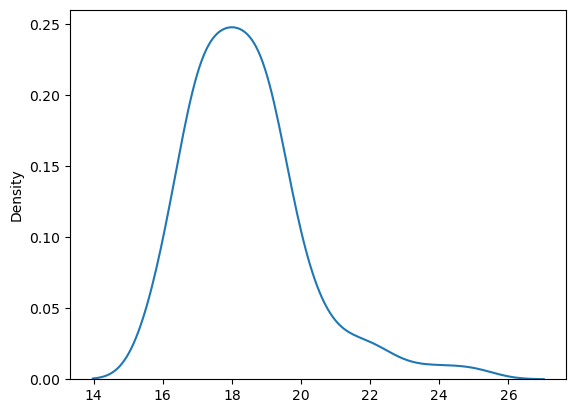

In [62]:
sns.kdeplot(data=forest_max_depths)
plt.show()

In [66]:
# Grid Search for Random Forest Regression

param_grid = [
    {
        'n_estimators': [50, 150, 200],
        'max_depth': [3,4,5,6],
        'bootstrap': [False, True],
        # 'max_features': [6,7,8,9,10,11],
    }
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, scoring = "r2", cv=10, return_train_score=True)
grid_search.fit(insurance_preprocessed, insurance_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False, True], 'max_depth': [3, 4, 5, 6],
                          'n_estimators': [50, 150, 200]}],
             return_train_score=True, scoring='r2')

In [67]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 4, 'n_estimators': 200}

In [68]:
cv_results = grid_search.cv_results_

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(mean_score, params)

0.8337307663701434 {'bootstrap': False, 'max_depth': 3, 'n_estimators': 50}
0.8337307663701434 {'bootstrap': False, 'max_depth': 3, 'n_estimators': 150}
0.8337307663701434 {'bootstrap': False, 'max_depth': 3, 'n_estimators': 200}
0.8452393564198963 {'bootstrap': False, 'max_depth': 4, 'n_estimators': 50}
0.8452393564198966 {'bootstrap': False, 'max_depth': 4, 'n_estimators': 150}
0.8452393564198966 {'bootstrap': False, 'max_depth': 4, 'n_estimators': 200}
0.8367352214042165 {'bootstrap': False, 'max_depth': 5, 'n_estimators': 50}
0.8368062372689126 {'bootstrap': False, 'max_depth': 5, 'n_estimators': 150}
0.8366383475387351 {'bootstrap': False, 'max_depth': 5, 'n_estimators': 200}
0.8177912690285709 {'bootstrap': False, 'max_depth': 6, 'n_estimators': 50}
0.8180390628260286 {'bootstrap': False, 'max_depth': 6, 'n_estimators': 150}
0.8178642586080722 {'bootstrap': False, 'max_depth': 6, 'n_estimators': 200}
0.8453192384321853 {'bootstrap': True, 'max_depth': 3, 'n_estimators': 50}
0.845

Cross validation score<br>
0.8493977043568284 {'bootstrap': True, 'max_depth': 4, 'n_estimators': 200}

In [69]:
# Random Forest Regression
forest_reg = grid_search.best_estimator_

# 10 fold cross validation.
forest_reg_scores = cross_validate(forest_reg, insurance_preprocessed, insurance_labels, scoring='r2', cv=10, return_train_score=True)
performance(forest_reg_scores)

PERFORMANCE REPORT
------------------
TRAIN SET 
---------
R2 scores:  [0.87445162 0.87768274 0.8671102  0.86547428 0.87450607 0.87843748
 0.88017787 0.87709855 0.87183424 0.87293589]
Mean:  0.873970894620155
Standard deviation:  0.004554695543412749
 
TEST SET 
--------
R2 scores:  [0.8513656  0.82358097 0.92464093 0.91447465 0.86381723 0.79664257
 0.78489754 0.82212375 0.85221563 0.85682814]
Mean:  0.8490586995634668
Standard deviation:  0.04303962980983328


#### Summary of optimization.

|Model|Train set score|Validation set score|Inference|Action|
|:-|:-|:-|:-|:-|
|lin_reg|||Underfitting|Discard|
|poly_reg|0.8419|0.8235|Acceptable overfit|Save|
|tree_reg|0.8670|0.8452|Acceptable overfit|Save|
|forest_reg|0.8739|0.8493|Acceptable overfit|Save|

## **Feature Importance**

In [70]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.16513007e-01, 1.75866435e-01, 8.72172194e-03, 9.62754453e-05,
       2.95259043e-05, 4.67303084e-01, 2.30103713e-01, 9.47145962e-04,
       6.74135879e-05, 1.02066979e-04, 2.49611702e-04])

In [72]:
cat_enco = preprocessor.named_transformers_['categorical_trnsf'].named_steps['cat_encoder']
cat_1hot_attr = []
for ele in range(len(cat_enco.categories_)):
    temp_ele = list(cat_enco.categories_[ele])
    for sub_ele in temp_ele:
        cat_1hot_attr.append(sub_ele)
attributes = num_attributes + cat_1hot_attr
sorted(zip(feature_importances, attributes), reverse=True)

[(0.46730308388196556, 'no'),
 (0.2301037134937451, 'yes'),
 (0.17586643455253612, 'bmi'),
 (0.11651300655025967, 'age'),
 (0.008721721941529483, 'children'),
 (0.0009471459619134024, 'northeast'),
 (0.00024961170188596407, 'southwest'),
 (0.00010206697866531636, 'southeast'),
 (9.627544533492681e-05, 'female'),
 (6.741358788073677e-05, 'northwest'),
 (2.952590428376164e-05, 'male')]

## **Saving the models**

In [73]:
joblib.dump(poly_reg, "models/poly_reg.pkl")
joblib.dump(tree_reg, "models/tree_reg.pkl")
joblib.dump(forest_reg, "models/forest_reg.pkl")

['models/forest_reg.pkl']

## **Evaluate the models on the test Test Set**

In [76]:
insurance_test = test_set.copy()
insurance_test = insurance_test[['age', 'bmi', 'children', 'sex', 'region', 'smoker', 'charges']]
insurance_test.head()

,age,bmi,children,sex,region,smoker,charges
764,45,25.175,2,female,northeast,no,9095.06825
887,36,30.020,0,female,northwest,no,5272.17580
890,64,26.885,0,female,northwest,yes,29330.98315
1293,46,25.745,3,male,northwest,no,9301.89355
259,19,31.920,0,male,northwest,yes,33750.29180


In [77]:
insurance_test_data = insurance_test.iloc[:, :-1]
insurance_test_labels = insurance_test.iloc[:, -1]

insurance_test_data_preprocessed = preprocessor.transform(insurance_test_data)

In [80]:
def testset_r2_score(model_name: str, labels, predictions):
    score = r2_score(labels, predictions)
    print("TEST SET PERFORMANCE\n-------------------------")
    print(f"Model: {model_name}")
    print(f"R2 score: {score}")
    print(' ')

In [81]:
# Prediction using Polynomial Regression
poly_reg_test_pred = poly_reg.predict(polynomial_features.transform(insurance_test_data_preprocessed))

testset_r2_score('poly_reg', insurance_test_labels, poly_reg_test_pred)

TEST SET PERFORMANCE
-------------------------
Model: poly_reg
R2 score: 0.8665697940706466
 


In [83]:
# Prediction using Decision Tree Regression
tree_reg_test_pred = tree_reg.predict(insurance_test_data_preprocessed)

testset_r2_score('tree_reg', insurance_test_labels, tree_reg_test_pred)

TEST SET PERFORMANCE
-------------------------
Model: tree_reg
R2 score: 0.8641310379678357
 


In [84]:
# Prediction using Random Forest Regression
forest_reg_test_pred = forest_reg.predict(insurance_test_data_preprocessed)

testset_r2_score('forest_reg', insurance_test_labels, forest_reg_test_pred)

TEST SET PERFORMANCE
-------------------------
Model: forest_reg
R2 score: 0.8737728534059557
 


|Model|Trainset accuracy|Testset accuracy|Inference|
|:-|:-|:-|:-|
|poly_reg|0.8419|0.8665|Good performance|
|tree_reg|0.8670|0.8641|Good performance|
|forest_reg|0.8739|0.8737|Good Performance|

******